In [13]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc,
    precision_recall_curve, precision_score, recall_score, accuracy_score,
    ConfusionMatrixDisplay, RocCurveDisplay
)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Step 1: Load Dataset
# Replace 'path_to_your_dataset.csv' with the correct dataset path
data = pd.read_csv('data/breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


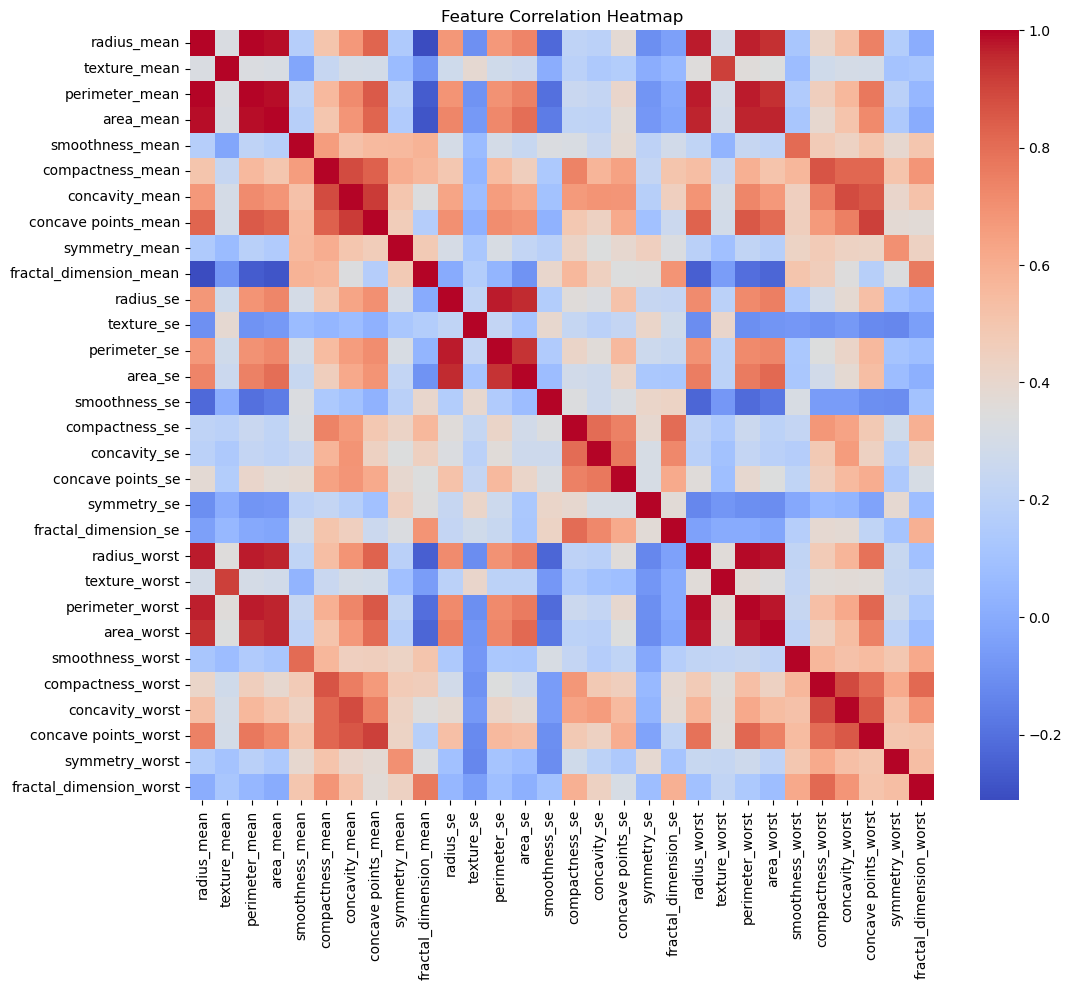

In [17]:
# Step 2: Data Preprocessing
# Drop ID column and encode diagnosis
data = data.drop(columns=['id'])
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Exploratory Data Analysis
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(X, columns=data.columns[1:]).corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:


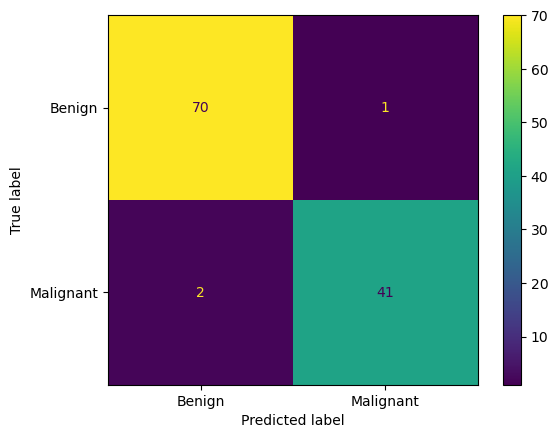

--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:


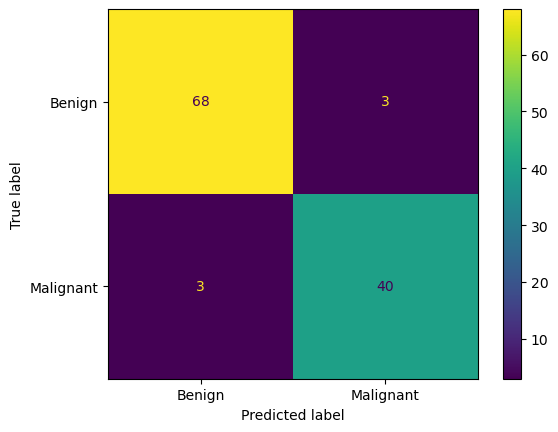

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:


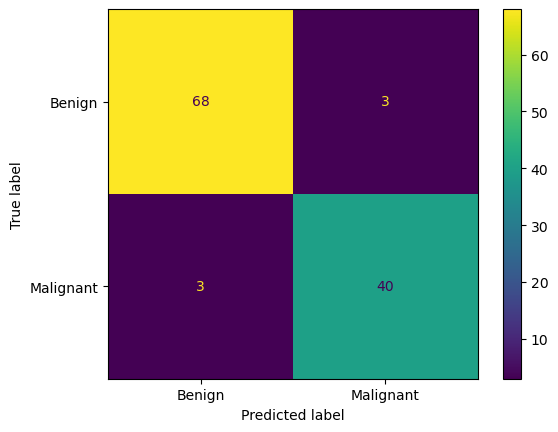

--- Support Vector Machine ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:


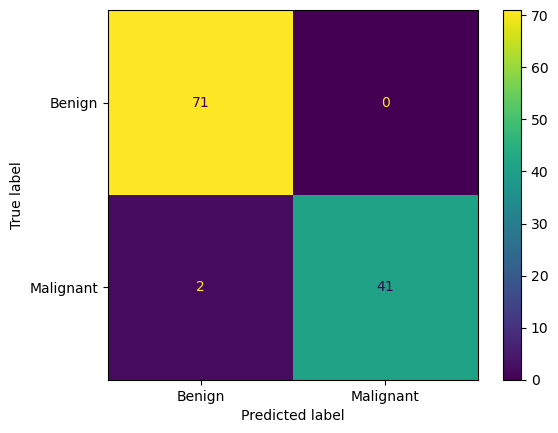

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:


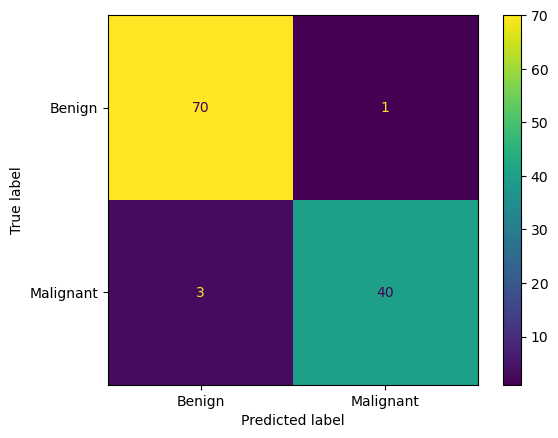

In [19]:
# Step 4: Model Training and Comparison
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "ROC AUC": auc(*roc_curve(y_test, y_prob)[:2])
    }
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["Benign", "Malignant"]).plot()
    plt.show()

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

--- Random Forest After Tuning ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



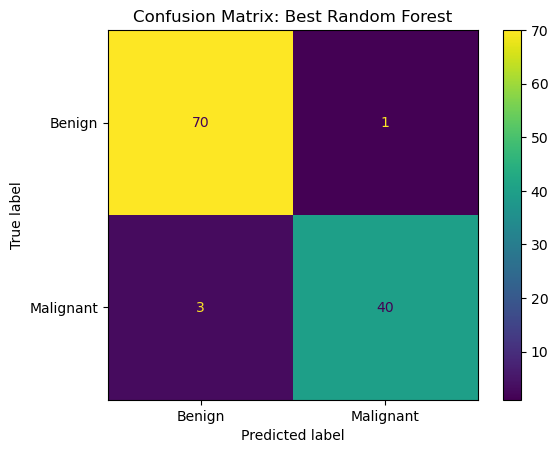

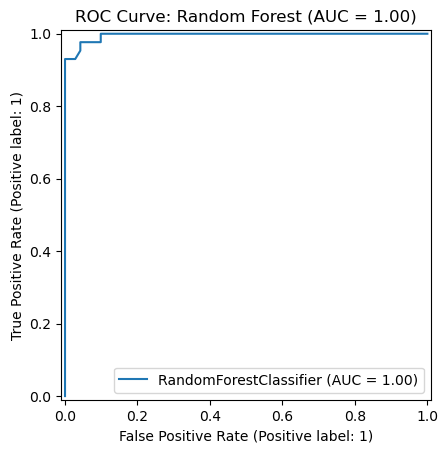


Summary of Model Performance:
                        Accuracy  Precision    Recall   ROC AUC
Logistic Regression     0.973684   0.976190  0.953488  0.997380
Support Vector Machine  0.982456   1.000000  0.953488  0.997380
Random Forest           0.964912   0.975610  0.930233  0.995251
K-Nearest Neighbors     0.947368   0.930233  0.930233  0.981985
Decision Tree           0.947368   0.930233  0.930233  0.943990


In [21]:
# Step 5: Hyperparameter Tuning for Random Forest
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters for Random Forest:", grid_search.best_params_)

# Evaluate the best Random Forest model
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
roc_auc_rf = auc(*roc_curve(y_test, y_prob_rf)[:2])

print("\n--- Random Forest After Tuning ---")
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=["Benign", "Malignant"]).plot()
plt.title("Confusion Matrix: Best Random Forest")
plt.show()

RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.title(f"ROC Curve: Random Forest (AUC = {roc_auc_rf:.2f})")
plt.show()

# Step 6: Summary of Results
print("\nSummary of Model Performance:")
results_df = pd.DataFrame(results).T
results_df.sort_values(by="ROC AUC", ascending=False, inplace=True)
print(results_df)
